### Import the necessary package

In [43]:
import pandas as pd

### Import the data

In [18]:
data = pd.read_csv("./data/mitradarat_reviews.csv")
data.head(1)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,ba083f1a-5d68-405b-ae8a-2ef72a364214,Joni AH Sitorus,https://play-lh.googleusercontent.com/a-/ALV-U...,Kurang update fiturnya.,3,0,1.4.1,2024-10-09 10:34:03,NaN,NaN,1.4.1


### Analyze and explore the data

In [19]:
# Print some basic statistics
print(f"Total reviews: {len(data)}",
        f"Total unique users: {len(data['userName'].unique())}",
        f"Last review date: {data['at'].max()}",
        f"Oldest review date: {data['at'].min()}",
        sep="\n")

Total reviews: 1902
Total unique users: 1890
Last review date: 2024-10-09 10:34:03
Oldest review date: 2023-02-28 21:45:26


In [20]:
# clean the data
## remove the unnecessary columns
data.drop(columns=["reviewId", "userName", "userImage", "thumbsUpCount", "reviewCreatedVersion", "replyContent", "at", "repliedAt", "appVersion"], inplace=True)
## remove the missing values
data.dropna(inplace=True)
## remove the duplicate values
data.drop_duplicates(inplace=True)
## remake the index
data.reset_index(drop=True, inplace=True)
# show the result
print(f"Total reviews after cleaning: {len(data)}")
data.head(3)

Total reviews after cleaning: 1660


,content,score
0,Kurang update fiturnya.,3
1,halte tidak lengkap. padahal ada penanda bus t...,2
2,Kedatangan lama padahal posisinya tinggal pute...,1


<Axes: title={'center': 'Score distribution'}, xlabel='Score', ylabel='Count'>

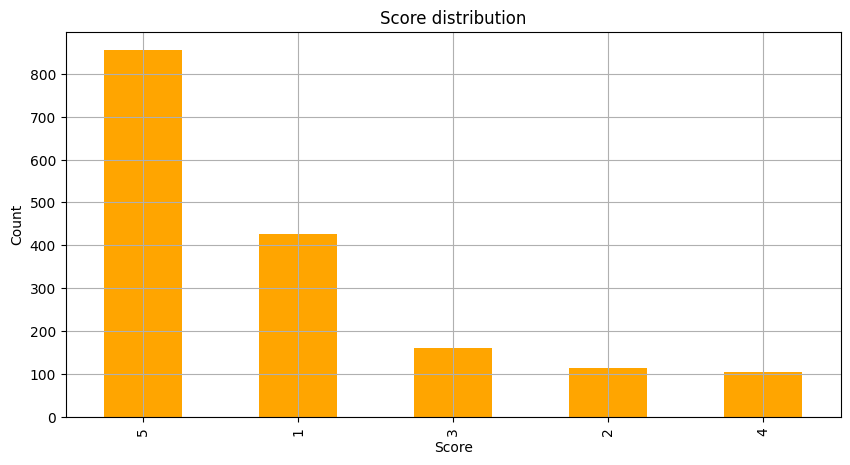

In [32]:
# Plot the score distribution
data.score.value_counts().plot(kind="bar", title="Score distribution",
                                xlabel="Score", ylabel="Count", color="orange",
                                figsize=(10, 5), grid=True)

<Axes: title={'center': 'Sentiment distribution'}, xlabel='Sentiment', ylabel='Count'>

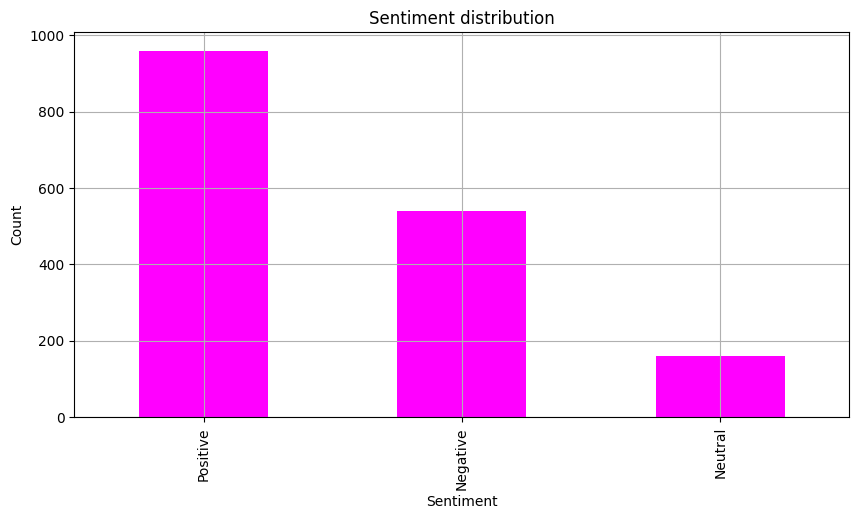

In [40]:
# Plot the sentiment distribution
## create a new column for sentiment
data.loc[data.score > 3, "sentiment"] = "Positive"
data.loc[data.score == 3, "sentiment"] = "Neutral"
data.loc[data.score < 3, "sentiment"] = "Negative"
## plot the sentiment
data.sentiment.value_counts().plot(kind="bar", title="Sentiment distribution",
                                    xlabel="Sentiment", ylabel="Count", color="magenta",
                                    figsize=(10, 5), grid=True)

In [55]:
# Peek of the sentiment distribution percentage
## create the summary sentiment data
summary_data_sentiment = pd.DataFrame(data.sentiment.value_counts()).reset_index()
## create the percentage column
summary_data_sentiment["percentage"] = round(summary_data_sentiment["count"] / summary_data_sentiment["count"].sum() * 100, 2)
## show the result
summary_data_sentiment

,sentiment,count,percentage
0,Positive,960,57.83
1,Negative,540,32.53
2,Neutral,160,9.64


### Save the data into a csv file

In [47]:
data.to_csv("./data/cleaned_dataset.csv", index=False)